# Speed dating Solution

Speed dating is a an approach to find new partners. In each speed dating event, the maximum number of participants per gender is limited to seven to ten persons. During the event, each female participant gets to know each male participant and vice versa. In so doing, the speed dating event is conducted in rounds which last about seven to eight minutes. In this short time frame, the singles have the opportunity to chat and to make an impression of each other. After each round, participants note on a piece of paper whether they want to "re-date" their counterpart. Then, chat partners are changed. This procedure is repeated until each "male-female-couples" have been formed (Source: Wikipedia 2022)

Fisman et al. (2006) have conducted an extensive experiment in order to determine which attributes are important to the "love at the first sight" (or within the first five minutes). 
 
Let's have a look at a small glimpse of their data!

## Data description

- gender: Female=0, Male=1
- match: 1=yes, 0=no; Did the participants indicate that they want to see each other again?
- wave: Experimental wave; Fishman et al. made many speeddating sessions (i.e., the first 20 participants participate in wave 1, the second 20 in wave 2, etc.) which are indicating by the “wave number” 

Participants were asked to indicate the individual importance of the factors of the other sex: 

- attr1_1: attractive (attr1_1)
- sinc1_1: sincere (sinc1_1)
- intel1_1: intelligent (intel1_1)
- fun1_1: fun (fun1_1)

Participants could allocate a total of 100 points to those attributes. They could distribute more points to factors that are more important in a potential date, and fewer points to those attributes that are less important in a potential date.  Total points must equal 100.


## 1) Read in the data set «speeddating.csv» with pandas and name the data frame «speeddating». How many instances and features are in the dataframe?

In [1]:
import pandas as pd
path = "https://raw.githubusercontent.com/casbdai/notebooks2023/main/Module3/00_Onboarding/01_Speeddating/speeddating.csv"
speeddating = pd.read_csv(path, on_bad_lines='skip')
speeddating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8289 entries, 0 to 8288
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    8289 non-null   int64  
 1   wave      8289 non-null   int64  
 2   match     8289 non-null   int64  
 3   attr1_1   8289 non-null   float64
 4   sinc1_1   8289 non-null   float64
 5   intel1_1  8289 non-null   float64
 6   fun1_1    8289 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 453.4 KB


## 2) Rename the features into «attractive», «sincere», «intelligent» and «fun»

We can rename variables in a dataframe in many different ways. An easy approach is using python dictionaries. Python dictionaries are another data structure (that we have covered only very superficially in class). They consist of two parts a "key" and a "value" that are stored with in a pair of {}. Key and values are seperated by a colon; multiple key-value-pairs are separated by a comma. 

Examples:

In [2]:
dict = {"key":"value", "key2": "value2"}
dict

{'key': 'value', 'key2': 'value2'}

In [3]:
dict = {"key":2, "key2": 34}
dict

{'key': 2, 'key2': 34}

For renaming variables, we can call the .rename() method on the dataframe. The keys are the old variable names, the values the new ones.

In [4]:
speeddating = speeddating.rename(columns={"attr1_1":"attractive",
                                          "sinc1_1":"sincere",
                                          "intel1_1":"intelligent",
                                          "fun1_1":"fun"})
speeddating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8289 entries, 0 to 8288
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       8289 non-null   int64  
 1   wave         8289 non-null   int64  
 2   match        8289 non-null   int64  
 3   attractive   8289 non-null   float64
 4   sincere      8289 non-null   float64
 5   intelligent  8289 non-null   float64
 6   fun          8289 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 453.4 KB


## 3) How many dates did match? What is the maximum of the feature «attractive»?

In [5]:
speeddating.loc[speeddating["match"]==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363 entries, 2 to 8282
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       1363 non-null   int64  
 1   wave         1363 non-null   int64  
 2   match        1363 non-null   int64  
 3   attractive   1363 non-null   float64
 4   sincere      1363 non-null   float64
 5   intelligent  1363 non-null   float64
 6   fun          1363 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 85.2 KB


A total of 1363 men and women have matched!

## 4) Create three «subsets» and save the results as new datafames. The singe subsets shall contain the following «waves»:

- Subset 1: data for waves 1 to 5
- Subset 2: data for waves 6 to 9
- Subset 3: data for waves 10 bis 21

In [6]:
speeddating_1to5 = speeddating.loc[(speeddating["wave"] >= 1) & (speeddating["wave"] <= 5)]
speeddating_6to9 = speeddating.loc[(speeddating["wave"] >= 6) & (speeddating["wave"] <= 9)]
speeddating_10to21 = speeddating.loc[(speeddating["wave"] >= 10) & (speeddating["wave"] <= 21)]

## 5)	Check whether the subsetting was sucessful and have a low at the number of instances in the newly created dataframes

In [7]:
speeddating_1to5.count()

gender         1800
wave           1800
match          1800
attractive     1800
sincere        1800
intelligent    1800
fun            1800
dtype: int64

In [8]:
speeddating_6to9.count()

gender         1557
wave           1557
match          1557
attractive     1557
sincere        1557
intelligent    1557
fun            1557
dtype: int64

In [9]:
speeddating_10to21.count()

gender         4932
wave           4932
match          4932
attractive     4932
sincere        4932
intelligent    4932
fun            4932
dtype: int64

the .info() method would work as well

## 6)	Merge the first and the third dataframe (i.e., the dataframes for wafe 1 to 5 and for waves 10 to 21)


In [10]:
merged_speeddating=pd.concat([speeddating_1to5, speeddating_10to21], axis=0)
merged_speeddating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6732 entries, 0 to 8288
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       6732 non-null   int64  
 1   wave         6732 non-null   int64  
 2   match        6732 non-null   int64  
 3   attractive   6732 non-null   float64
 4   sincere      6732 non-null   float64
 5   intelligent  6732 non-null   float64
 6   fun          6732 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 420.8 KB


## 7) What are the most important attributes for men and women? 

Use the .groupby() method to compare men and women!

In [11]:
speeddating.groupby("gender")["sincere"].mean()

gender
0    18.305008
1    16.514042
Name: sincere, dtype: float64

In [12]:
speeddating.groupby("gender")["attractive"].mean()

gender
0    18.055224
1    26.794220
Name: attractive, dtype: float64

In [13]:
speeddating.groupby("gender")["intelligent"].mean()

gender
0    21.002502
1    19.560279
Name: intelligent, dtype: float64

In [14]:
speeddating.groupby("gender")["fun"].mean()

gender
0    17.147292
1    17.763893
Name: fun, dtype: float64

For men, attractiness seems to be most important, for women being sincere and intelligent. Which surprise.

## 8) Do patterns differ for matching pairs?

Select matching pairs first and then use the .groupby() method!

In [15]:
speeddating.loc[speeddating["match"]==1].groupby("gender")["sincere"].mean()

gender
0    18.311912
1    15.480571
Name: sincere, dtype: float64

In [16]:
speeddating.loc[speeddating["match"]==1].groupby("gender")["intelligent"].mean()

gender
0    21.298015
1    19.698199
Name: intelligent, dtype: float64

In [17]:
speeddating.loc[speeddating["match"]==1].groupby("gender")["attractive"].mean()

gender
0    17.765750
1    27.921918
Name: attractive, dtype: float64

In [18]:
speeddating.loc[speeddating["match"]==1].groupby("gender")["fun"].mean()

gender
0    17.885235
1    18.170878
Name: fun, dtype: float64

No, for matching pairs do not generally change. If at all, the observed differences become more salient and stronger.

## 9)	What is the sum of all points given away from men and women? 

Create a new variable "total_points" in which you sum up the points for the four traits (e.g, sincere, attractive, etc.)? What can you observe? Does this offer an alternative explanation for the results?

In [19]:
speeddating["total_points"] = speeddating["sincere"] + speeddating["intelligent"] + speeddating["attractive"]  + speeddating["fun"]
speeddating.groupby("gender")["total_points"].sum()

gender
0    307353.86
1    335753.45
Name: total_points, dtype: float64

Men give away more points than women. This, might reflect an alternative interpretation of the results

Beyond the scope of the question: We can attack that by an additional analyses. This, is particularly the case for attractiveness:

In [20]:
speeddating.groupby("gender")["attractive"].sum()

gender
0     74477.80
1    111571.13
Name: attractive, dtype: float64

## 10) Create a bar plot with which you compare gender differences in being "attractive" and "intelligent"

We did not cover that extensively in class but plotting is quite easy. Check the video tutorial from the pandas handson!

<Axes: xlabel='gender'>

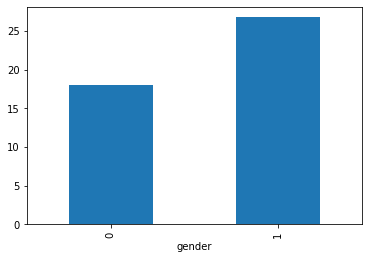

In [21]:
speeddating.groupby("gender")["attractive"].mean().plot(kind="bar", x="gender",y="attractive")

<Axes: xlabel='gender'>

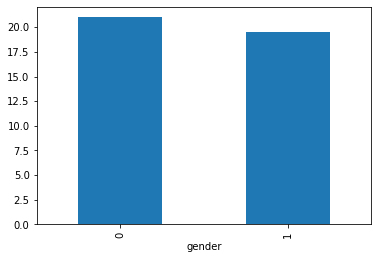

In [22]:
speeddating.groupby("gender")["intelligent"].mean().plot(kind="bar", x="gender",y="intelligent")

## 11) Create a scatterplot with you check correlation between being rated as "intelligent" and "attractive". How would you interpret results?

change the plot type to "scatter" and enter the right variables

<Axes: xlabel='attractive', ylabel='intelligent'>

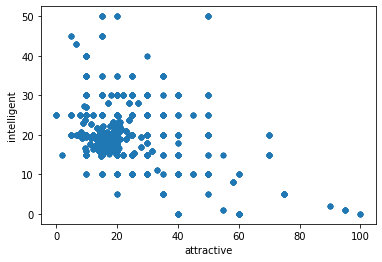

In [23]:
speeddating.plot(kind="scatter", x="attractive",y="intelligent")

Oh, there seems to be a slight negative correlation between intelligence and attractiveness. The higher intelligence the lower attractiveness... 

## 12) Create a scatterplot with you check correlation between being rated as "intelligent" and "fun".  How would you interpret results?

<Axes: xlabel='fun', ylabel='intelligent'>

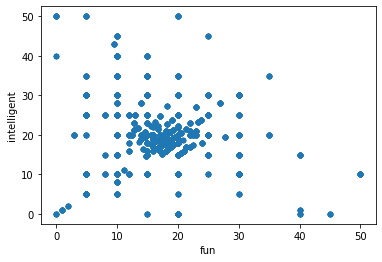

In [24]:
speeddating.plot(kind="scatter", x="fun",y="intelligent")

Ok, intelligent people seem to be funnier :)